In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


plt.style.use('seaborn')

binary = {
    "all":"all_years_binary.csv",
    "filtered":"filtered_years_binary.csv"
}

rows = {
    "all":"all_years_rows.csv",
    "filtered":"filtered_years_rows.csv"
}

In [2]:
all_rows = pd.read_csv(rows["all"])
all_rows["set_id"] = all_rows["set_id"].map(lambda x : int(x.strip("[").strip("]")))
all_rows["time_to_request_all_data"] = all_rows["time_to_request_all_data"].map(lambda x: str(x).split(' ')[0]).astype(float)
all_rows.head()

,set_id,min_date,max_date,time_to_request_all_data,tp_sum
0,1,2007-06-21 10:00:00+00:00,2021-09-27 11:30:00+00:00,0.733859,9657846.00
1,2,2007-06-21 01:00:00+00:00,2021-12-31 23:30:00+00:00,0.694940,9146511.00
2,3,2007-10-29 17:00:00+00:00,2018-04-09 11:50:00+00:00,0.639155,1068029.18
3,4,1986-02-01 00:00:00+00:00,1995-04-03 12:00:00+00:00,0.612765,1131676.60
4,5,1973-12-01 01:00:00+00:00,2021-12-31 23:50:00+00:00,1.834241,20393140.50


In [3]:
all_binary = pd.read_csv(binary["all"])
all_binary["set_id"] = all_binary["set_id"].astype(int)
all_binary["time_to_request_all_data"] = all_binary["time_to_request_all_data"].map(lambda x: str(x).split(' ')[0]).astype(float)
all_binary.head()

,set_id,min_date,max_date,time_to_request_all_data,tp_sum
0,1,2007-06-21 10:00:00+00:00,2021-09-27 11:30:00+00:00,0.088626,9657846.00
1,2,2007-06-21 01:00:00+00:00,2021-12-31 23:30:00+00:00,0.089621,9146511.00
2,3,2007-10-29 17:00:00+00:00,2018-04-09 11:50:00+00:00,0.088832,1068029.18
3,4,1986-02-01 00:00:00+00:00,1995-04-03 12:00:00+00:00,0.069758,1131676.60
4,5,1973-12-01 01:00:00+00:00,2021-12-31 23:50:00+00:00,0.466412,20393140.50


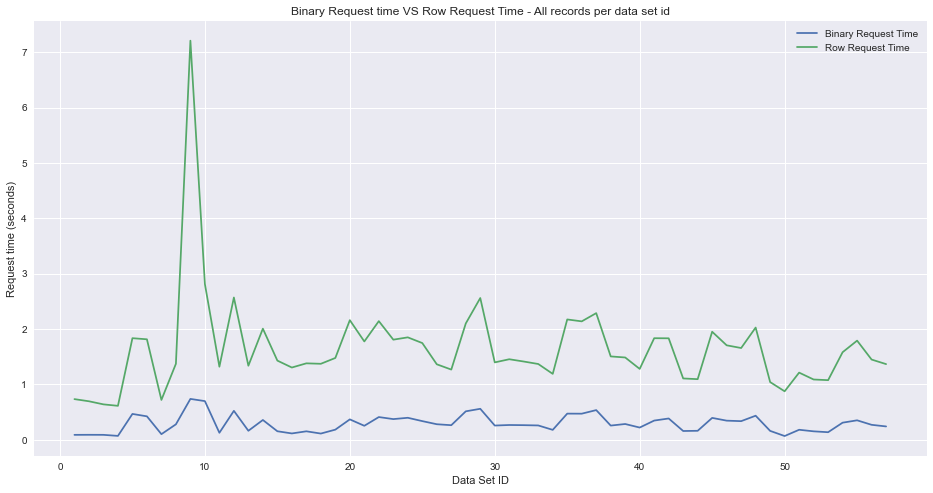

In [4]:
plt.figure(figsize=(16,8))
plt.plot(all_binary["set_id"], all_binary["time_to_request_all_data"], label="Binary Request Time")
plt.plot(all_rows["set_id"], all_rows["time_to_request_all_data"], label="Row Request Time")
plt.legend()
plt.title("Binary Request time VS Row Request Time - All records per data set id")
plt.xlabel("Data Set ID")
plt.ylabel("Request time (seconds)")

plt.savefig("all_records_per_id.png", bbox_inches='tight')
plt.show()

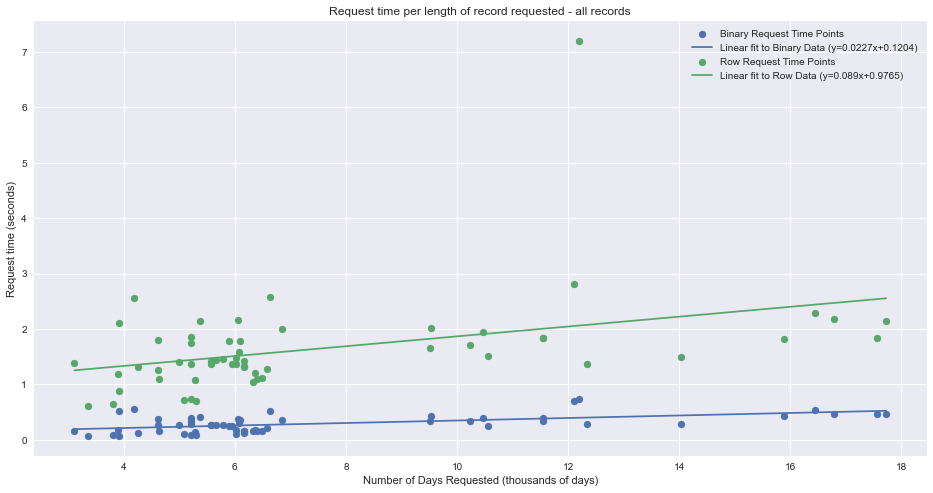

In [5]:
all_binary["min_date"] = pd.to_datetime(all_binary["min_date"])
all_binary["max_date"] = pd.to_datetime(all_binary["max_date"])
all_binary["time_delta"] = (all_binary["max_date"] - all_binary["min_date"]).dt.days / 1000


all_rows["min_date"] = pd.to_datetime(all_rows["min_date"])
all_rows["max_date"] = pd.to_datetime(all_rows["max_date"])
all_rows["time_delta"] = (all_rows["max_date"] - all_rows["min_date"]).dt.days / 1000

all_binary = all_binary.sort_values(by="time_delta")
all_rows = all_rows.sort_values(by="time_delta")

# regression
x_b = all_binary["time_delta"].values.reshape(-1,1)
y_b = all_binary["time_to_request_all_data"].values.reshape(-1,1)

r = LinearRegression()
r.fit(x_b, y_b)
y_pred_b = r.predict(x_b)



x_r = all_rows["time_delta"].values.reshape(-1,1)
y_r = all_rows["time_to_request_all_data"].values.reshape(-1,1)

r_row = LinearRegression()
r_row.fit(x_r, y_r)
y_pred_r = r_row.predict(x_r)

plt.figure(figsize=(16,8))
plt.scatter(all_binary["time_delta"], all_binary["time_to_request_all_data"], label="Binary Request Time Points")
plt.plot(all_binary["time_delta"], y_pred_b, label="Linear fit to Binary Data (y={}x+{})".format(round(r.coef_[0][0],4), round(r.intercept_[0], 4)))
plt.scatter(all_rows["time_delta"], all_rows["time_to_request_all_data"], label="Row Request Time Points")
plt.plot(all_rows["time_delta"], y_pred_r, label="Linear fit to Row Data (y={}x+{})".format(round(r_row.coef_[0][0], 4), round(r_row.intercept_[0], 4)))
plt.legend()
plt.title("Request time per length of record requested - all records")
plt.xlabel("Number of Days Requested (thousands of days)")
plt.ylabel("Request time (seconds)")

plt.savefig("all_records_per_length.png", bbox_inches='tight')
plt.show()

In [6]:
f_rows = pd.read_csv(rows["filtered"])
# one row is null in filtering
f_rows = f_rows.dropna()
f_rows["set_id"] = f_rows["set_id"].map(lambda x : int(x.strip("[").strip("]")))
f_rows["time_to_request_all_data"] = f_rows["time_to_gather_data"].map(lambda x: str(x).split(' ')[0]).astype(float)
f_rows.head()

,set_id,min_date,max_date,time_to_gather_data,tp_sum,time_to_request_all_data
0,1,2011-04-14 06:00:00+00:00,2013-01-01 07:00:00+00:00,0.6758577823638916 seconds,1487178.00,0.675858
1,2,2012-12-04 09:00:00+00:00,2016-01-01 07:00:00+00:00,0.6878962516784668 seconds,2457972.00,0.687896
2,3,2007-10-29 17:00:00+00:00,2014-01-01 07:50:00+00:00,0.753136157989502 seconds,601275.99,0.753136
3,4,1986-02-01 00:00:00+00:00,1992-01-01 07:00:00+00:00,0.7845499515533447 seconds,736350.90,0.784550
4,5,1997-01-01 08:00:00+00:00,2005-01-01 07:00:00+00:00,0.8876559734344482 seconds,620906.39,0.887656


In [7]:
f_bin = pd.read_csv(binary["filtered"])
# one row is null in filtering
f_bin = f_bin.dropna()
f_bin["time_to_request_all_data"] = f_bin["time_to_gather_data"].map(lambda x: str(x).split(' ')[0]).astype(float)
f_bin.head()

,set_id,min_date,max_date,time_to_gather_data,tp_sum,time_to_request_all_data
0,1,2011-04-14 06:00:00+00:00,2012-12-31 23:00:00+00:00,0.1602039337158203 seconds,1486386.00,0.160204
1,2,2012-12-04 09:00:00+00:00,2015-12-31 21:00:00+00:00,0.1262531280517578 seconds,2457279.00,0.126253
2,3,2007-10-29 17:00:00+00:00,2013-12-31 23:50:00+00:00,0.1247720718383789 seconds,601183.48,0.124772
3,4,1986-02-01 00:00:00+00:00,1991-12-31 23:00:00+00:00,0.09161782264709473 seconds,736217.30,0.091618
4,5,1997-01-01 00:00:00+00:00,2004-12-31 23:00:00+00:00,0.6141941547393799 seconds,620868.96,0.614194


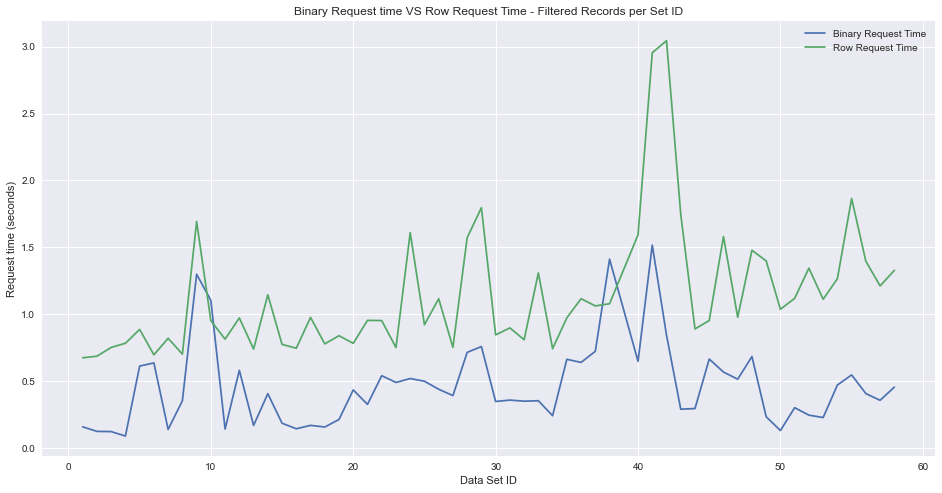

In [9]:
plt.figure(figsize=(16,8))
plt.plot(f_bin["set_id"], f_bin["time_to_request_all_data"], label="Binary Request Time")
plt.plot(f_rows["set_id"], f_rows["time_to_request_all_data"], label="Row Request Time")
plt.legend()
plt.title("Binary Request time VS Row Request Time - Filtered Records per Set ID")
plt.xlabel("Data Set ID")
plt.ylabel("Request time (seconds)")
plt.savefig("filtered_records_per_id.png", bbox_inches='tight')
plt.show()

In [10]:
print("Binary")
display(f_bin.loc[f_bin["set_id"] == 37,:])
print("Rows")
display(f_rows.loc[f_rows["set_id"] == 37,:])

Binary


,set_id,min_date,max_date,time_to_gather_data,tp_sum,time_to_request_all_data
36,37,2005-01-01 00:00:00+00:00,2017-06-22 13:10:00+00:00,0.7242989540100098 seconds,1933665.41,0.724299


Rows


,set_id,min_date,max_date,time_to_gather_data,tp_sum,time_to_request_all_data
36,37,2005-01-01 08:00:00+00:00,2017-06-22 13:10:00+00:00,1.0632572174072266 seconds,1933599.29,1.063257


In [11]:
res = []
for i in f_bin["set_id"].unique():
    d_bin = f_bin[f_bin["set_id"] == i]["tp_sum"].values[0]
    d_row = f_rows[f_rows["set_id"] == i]["tp_sum"].values[0]
    if d_bin != d_row:
        res.append(i)

print(len(res))
len(f_bin)

51


57

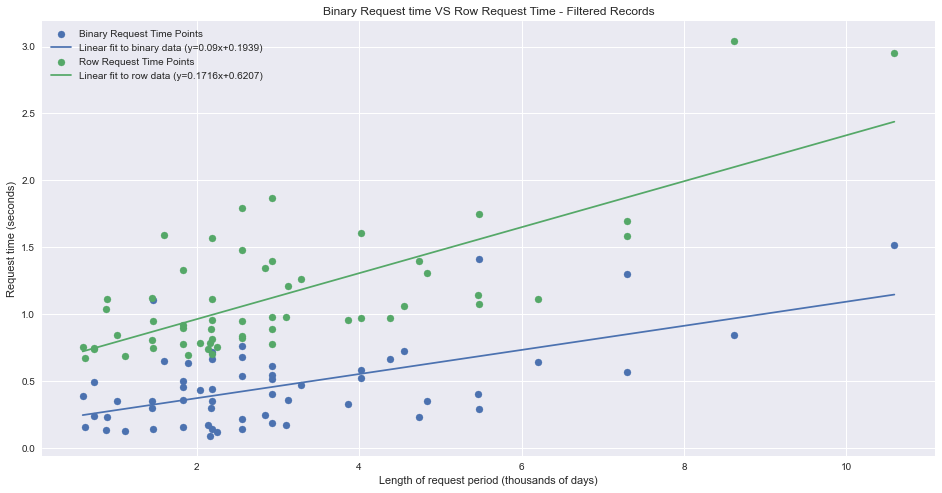

In [12]:
f_bin["min_date"] = pd.to_datetime(f_bin["min_date"])
f_bin["max_date"] = pd.to_datetime(f_bin["max_date"])
f_bin["time_delta"] = (f_bin["max_date"] - f_bin["min_date"]).dt.days / 1000


f_rows["min_date"] = pd.to_datetime(f_rows["min_date"])
f_rows["max_date"] = pd.to_datetime(f_rows["max_date"])
f_rows["time_delta"] = (f_rows["max_date"] - f_rows["min_date"]).dt.days / 1000

f_bin = f_bin.sort_values(by="time_delta")
f_rows = f_rows.sort_values(by="time_delta")



# regression
x_b = f_bin["time_delta"].values.reshape(-1,1)
y_b = f_bin["time_to_request_all_data"].values.reshape(-1,1)

r_bin = LinearRegression()
r_bin.fit(x_b, y_b)
y_pred_b = r_bin.predict(x_b)




x_r = f_rows["time_delta"].values.reshape(-1,1)
y_r = f_rows["time_to_request_all_data"].values.reshape(-1,1)

r_row = LinearRegression()
r_row.fit(x_r, y_r)
y_pred_r = r_row.predict(x_r)





plt.figure(figsize=(16,8))
plt.scatter(f_bin["time_delta"], f_bin["time_to_request_all_data"], label="Binary Request Time Points")
plt.plot(f_bin["time_delta"], y_pred_b, label="Linear fit to binary data (y={}x+{})".format(round(r_bin.coef_[0][0], 4), round(r_bin.intercept_[0], 4)))
plt.scatter(f_rows["time_delta"], f_rows["time_to_request_all_data"], label="Row Request Time Points")
plt.plot(f_rows["time_delta"], y_pred_r, label="Linear fit to row data (y={}x+{})".format(round(r_row.coef_[0][0], 4), round(r_row.intercept_[0], 4)))
plt.legend()
plt.title("Binary Request time VS Row Request Time - Filtered Records")
plt.xlabel("Length of request period (thousands of days)")
plt.ylabel("Request time (seconds)")
plt.savefig("filtered_records_per_length.png", bbox_inches='tight')
plt.show()